# Install & Import libraries

In [428]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [429]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [430]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from sklearn.metrics import f1_score
from PIL import Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load data

## Jooyeong's Path

In [431]:
# Train Data
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

## Jin's Path

In [432]:
"""# Train Data _Jin's data
dir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)
# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)"""

"# Train Data _Jin's data\ndir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'\ndir_dt_train = pathlib.Path(dir_dt_train)\n# Validation Data(merged to the train data due to the small amount of validation data)\n#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'\n#dir_dt_val = pathlib.Path(dir_dt_val)\n\n# Test Data\ndir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'\ndir_dt_test = pathlib.Path(dir_dt_test)"

In [433]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

"# Train Data\ndir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'\ndir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'\ndir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)\ndir_dt_train_normal = pathlib.Path(dir_dt_train_normal)\n\ndt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))\ndt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))\n\nimg_cnt_train_pneumonia = len(dt_train_pneumonia)\nimg_cnt_train_normal = len(dt_train_normal)\n\nprint('Training Data')\nprint('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))\n\n\n# Validation Data\ndir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'\ndir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'\ndir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)\ndir_dt_val_normal = pathlib.Path(dir_dt_val_normal)\n\ndt_val_pneumonia = list(dir_dt_val_

In [434]:
# Size of each image
"""for f in dir_dt_train.glob("PNEUMONIA/*.jpeg"):
  img = Image.open(f)
  print(img.size)"""

'for f in dir_dt_train.glob("PNEUMONIA/*.jpeg"):\n  img = Image.open(f)\n  print(img.size)'

# Create a dataset

## Define parameters

In [435]:
#batch_size = 32   # Number of Images in each batch
batch_size = 20   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

### Reference
**tf.keras.preprocessing.image_dataset_from_directory**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

### Original Data

In [436]:
"""dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training'
)"""

"dt_train = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_train,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123,\n    validation_split=.2,\n    subset='training'\n)"

In [437]:
"""dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation'
  )"""

"dt_val = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_train,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123,\n    validation_split=.2,\n    subset='validation'\n  )"

In [438]:
"""dt_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
  )"""

"dt_test = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_test,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123\n  )"

### Subset of Original Data
#### Train: 400 of 500 images(80%)
#### Validation: 100 of 500 images(20%)
#### Test: 624 images

In [439]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split= 1-(400/5232),
    subset='training')

Found 5232 files belonging to 2 classes.
Using 400 files for training.


In [440]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=100/5232,
    subset='validation')

Found 5232 files belonging to 2 classes.
Using 100 files for validation.


In [441]:
dt_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123)

Found 624 files belonging to 2 classes.


In [442]:
num_class = len(dt_train.class_names)

# Visualize the data

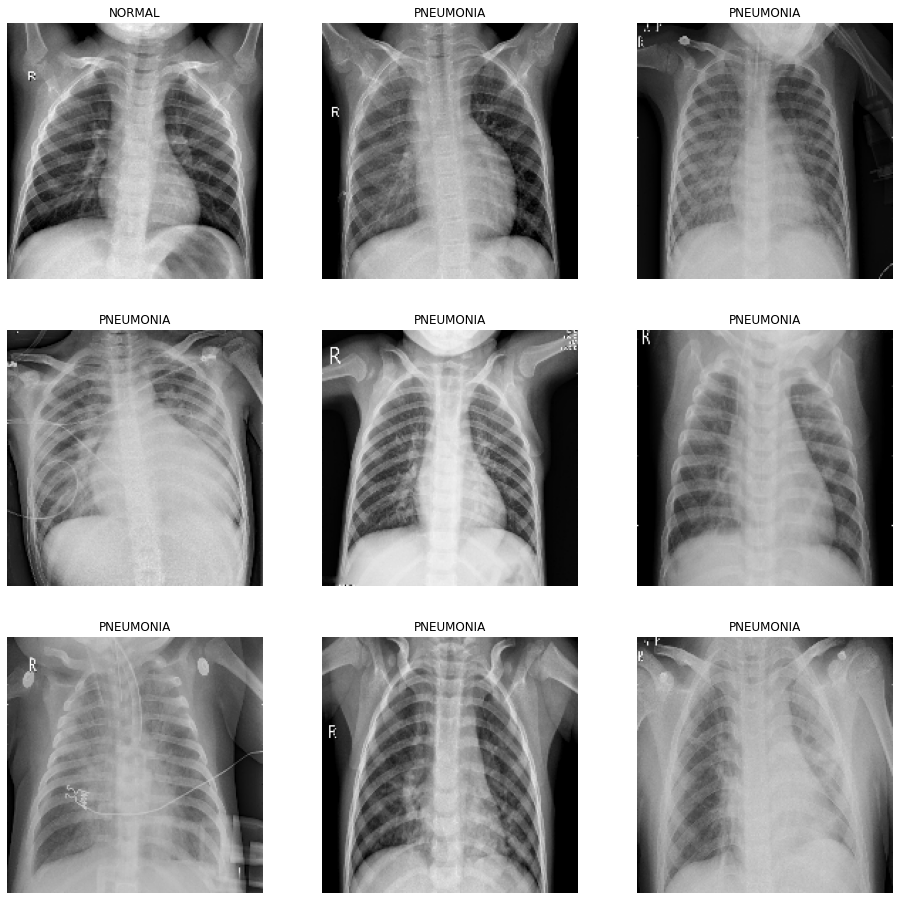

In [363]:
plt.figure(figsize=(16, 16))

for images, labels in dt_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

## Check Data Structure

### Reference
**tf.data.Dataset**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [364]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 1)
(20,)


In [365]:
for image_batch, labels_batch in dt_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 1)
(20,)


## Examples of Data Augmentation

### RandomFlip

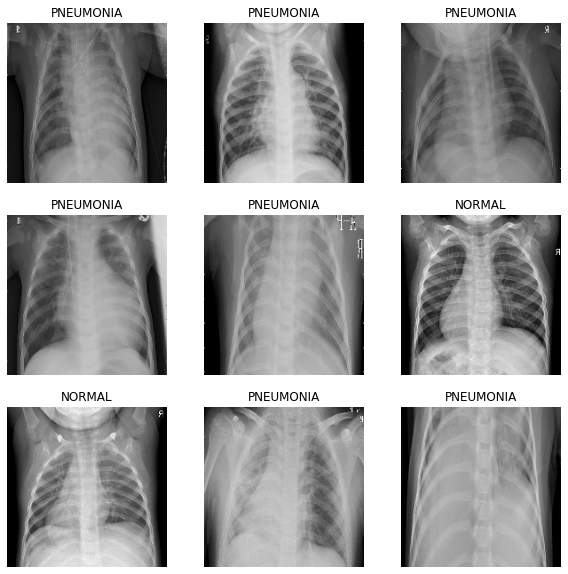

In [366]:
dt_augm_filp = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal")
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_filp(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomRotation

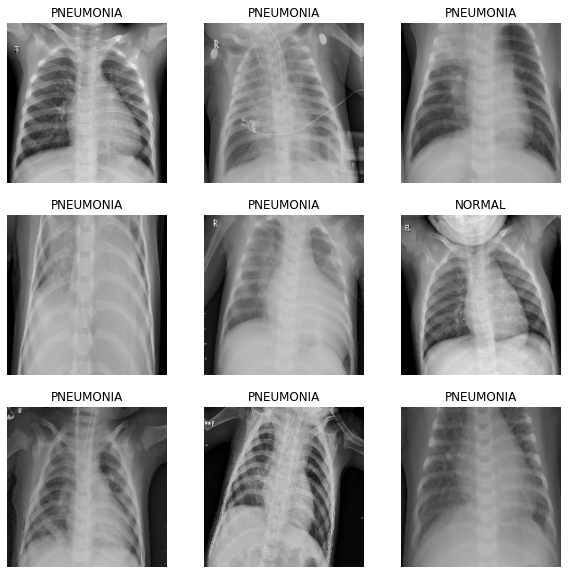

In [367]:
dt_augm_rotation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.01)
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_rotation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomZoom

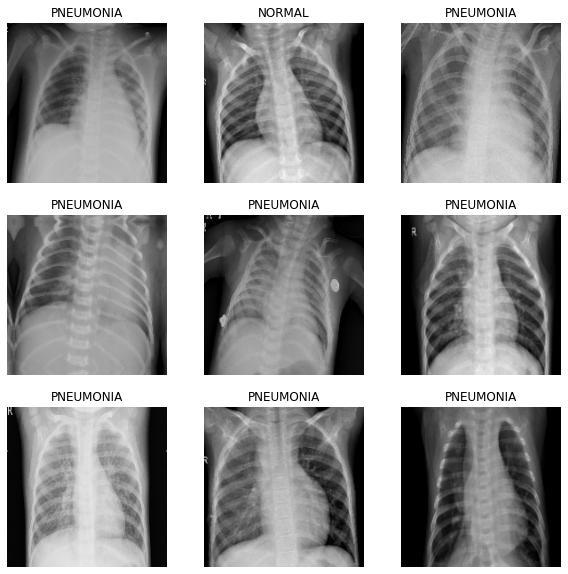

In [368]:
dt_augm_zoom = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.1)
])


plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_zoom(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for the better performance

In [369]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
"""# Before normalizing layer
image_batch, labels_batch = next(iter(dt_train))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

normalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) 
normalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))

# After nomarlizing layer
image_batch, labels_batch = next(iter(normalized_dt))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))"""

'# Before normalizing layer\nimage_batch, labels_batch = next(iter(dt_train))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))\n\nnormalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) \nnormalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))\n\n# After nomarlizing layer\nimage_batch, labels_batch = next(iter(normalized_dt))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))'

# Experimental Designs

## Define a function to build a model



1.   Non-Contrastive Learning
2.   Contrastive Learning

No Dropout & Data Augmentation (RandomFlip, RandomRotation, RandomZoom)

In [370]:
def build_model(dt_train, dt_augms):

  model = Sequential()
  
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
  if dt_augms == []:
    print('Non-Contrastive Learning')
    model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(img_height, img_width, 1)))
  else:
    print('Contrastive Learning')
    if dt_augms == {'randomflip'}:
      print('RandomFlip')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomrotation'}:
      print('RandomRotation')
      model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomzoom'}:
      print('RandomZoom')
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomrotation'}:
      print('RandomFlip & RandomRotation')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomzoom'}:
      print('RandomFlip & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomrotation', 'randomzoom'}:
      print('RandomRotation & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomrotation', 'randomzoom'}:
      print('RandomFlip & RandomRotation & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))

    model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'))
       
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_class, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  
  return model

## Convolutional Neural Network(CNN): Supervised Learning Approach 

##### Build Model

In [371]:
dt_augms = []
model_cnn_non_contrastive = build_model(dt_train, dt_augms)
model_cnn_non_contrastive.summary()

Non-Contrastive Learning
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_200 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_201 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_202 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_205 (Conv2D)         

##### Train Model

In [372]:
epochs=10

history = model_cnn_non_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 3s 104ms/step - loss: 4.9191 - accuracy: 0.6672 - val_loss: 0.5955 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4757 - accuracy: 0.7985 - val_loss: 0.4119 - val_accuracy: 0.8300
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2994 - accuracy: 0.8644 - val_loss: 0.4273 - val_accuracy: 0.7800
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2578 - accuracy: 0.9183 - val_loss: 0.6223 - val_accuracy: 0.8100
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2096 - accuracy: 0.9224 - val_loss: 0.3712 - val_accuracy: 0.8500
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1445 - accuracy: 0.9236 - val_loss: 0.2258 - val_accuracy: 0.9100
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1285 - accuracy: 0.9401 - val_loss: 0.2362 - val_accuracy: 0.9200
Epoch 8/10
20/20 [

##### Plot Evaluation

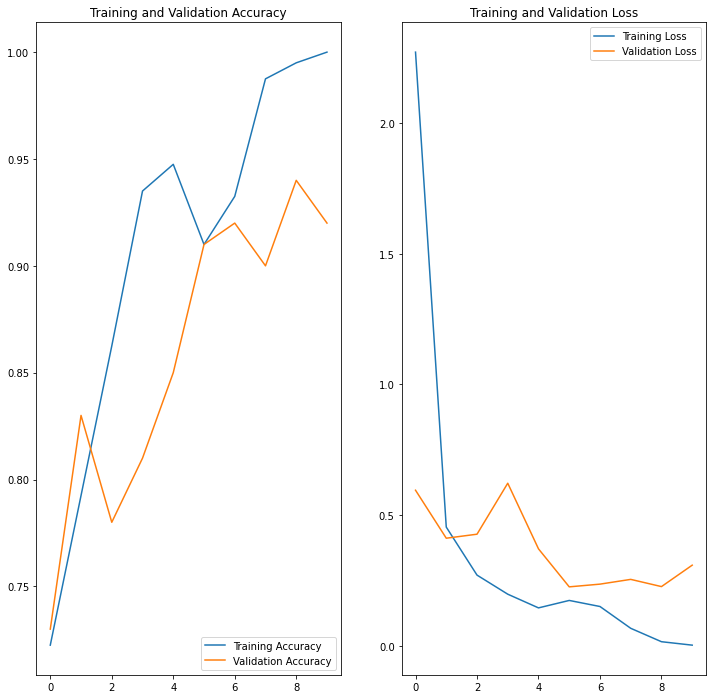

In [373]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [374]:
model_cnn_non_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 74ms/step - loss: 1.7610 - accuracy: 0.7452


[1.7609716653823853, 0.745192289352417]

## Convolutional Neural Network(CNN): Contrastive Learning Approach 

### 1.Apply one augmentation:

#### 1-1 RandomFlip

##### Build Model

In [375]:
dt_augms = {'randomflip'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_26 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_205 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_206 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_207 (Ma

##### Train Model

In [376]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 2.1989 - accuracy: 0.6108 - val_loss: 0.6133 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5205 - accuracy: 0.7909 - val_loss: 0.4814 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4325 - accuracy: 0.8127 - val_loss: 0.5515 - val_accuracy: 0.7400
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3693 - accuracy: 0.8477 - val_loss: 0.5553 - val_accuracy: 0.7500
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3062 - accuracy: 0.8823 - val_loss: 0.3174 - val_accuracy: 0.8600
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.8979 - val_loss: 0.2990 - val_accuracy: 0.8700
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2027 - accuracy: 0.9215 - val_loss: 0.1934 - val_accuracy: 0.9100
Epoch 8/10
20/20 [=

##### Plot Evaluation

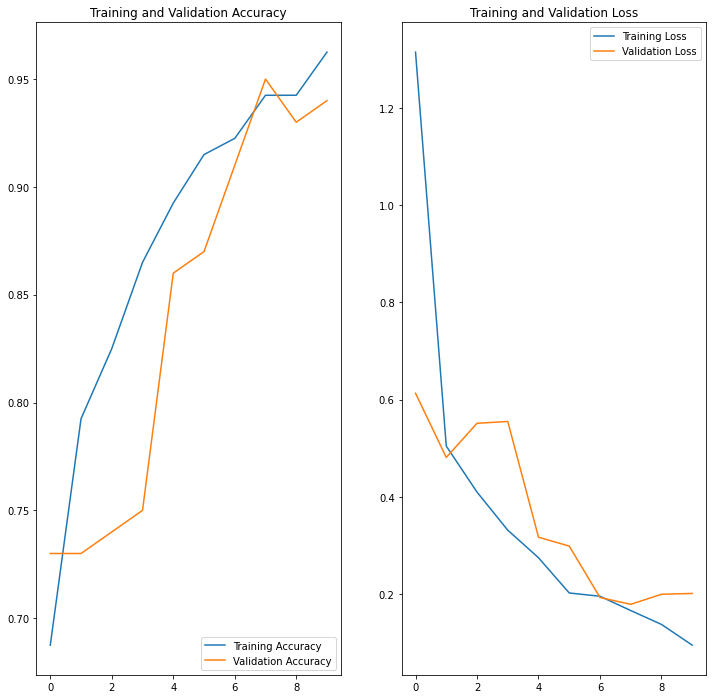

In [377]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#131/131 [==============================] - 1s 8ms/step - loss: 0.0498 - accuracy: 0.9803 - val_loss: 0.0435 - val_accuracy: 0.9837

##### Test Model

In [378]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 74ms/step - loss: 1.0243 - accuracy: 0.7404


[1.0242758989334106, 0.7403846383094788]

#### 1-2 RandomRotation

##### Build Model

In [379]:
dt_augms = {'randomrotation'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomRotation
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_23 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_212

##### Train Model

In [380]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 3.2132 - accuracy: 0.6307 - val_loss: 0.5560 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5436 - accuracy: 0.7806 - val_loss: 0.5038 - val_accuracy: 0.8900
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4291 - accuracy: 0.8442 - val_loss: 0.5018 - val_accuracy: 0.7400
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3446 - accuracy: 0.8664 - val_loss: 0.3122 - val_accuracy: 0.8700
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3063 - accuracy: 0.9037 - val_loss: 0.1801 - val_accuracy: 0.9300
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2333 - accuracy: 0.9007 - val_loss: 0.1809 - val_accuracy: 0.8900
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.9409 - val_loss: 0.3097 - val_accuracy: 0.8800
Epoch 8/10
20/20 [=

##### Plot Evaluation

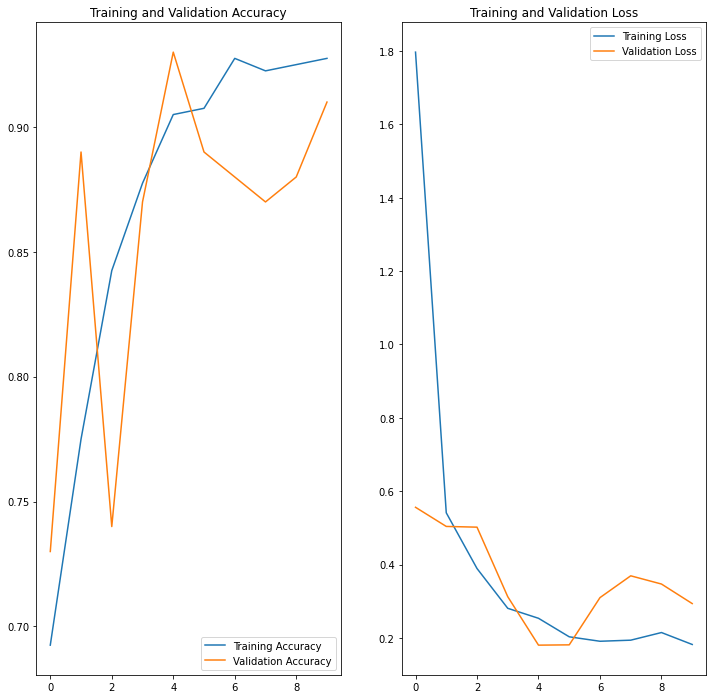

In [381]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [382]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 72ms/step - loss: 0.9428 - accuracy: 0.7019


[0.9428463578224182, 0.7019230723381042]

#### 1-3 RandomZoom 

##### Build Model

In [383]:
dt_augms = {'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomZoom
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_23 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_215 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_216 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_217 (Ma

##### Train Model

In [384]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 4.0462 - accuracy: 0.5990 - val_loss: 0.5728 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5542 - accuracy: 0.7803 - val_loss: 0.5661 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5184 - accuracy: 0.7804 - val_loss: 0.4458 - val_accuracy: 0.7800
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4012 - accuracy: 0.8114 - val_loss: 0.5001 - val_accuracy: 0.7800
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3676 - accuracy: 0.8563 - val_loss: 0.2613 - val_accuracy: 0.9000
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2310 - accuracy: 0.8965 - val_loss: 0.1486 - val_accuracy: 0.9500
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1420 - accuracy: 0.9400 - val_loss: 0.1949 - val_accuracy: 0.9300
Epoch 8/10
20/20 [=

##### Plot Evaluation

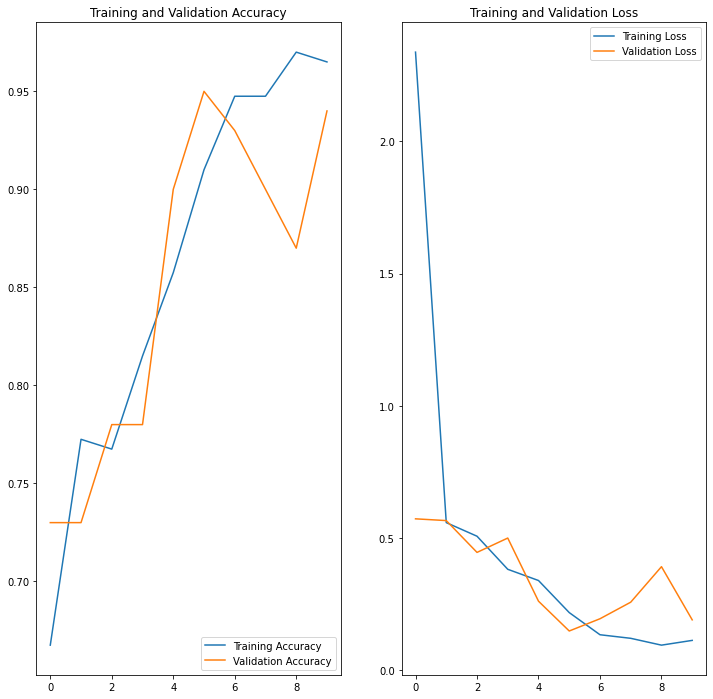

In [385]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model


In [386]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 73ms/step - loss: 0.9822 - accuracy: 0.7596


[0.9821640253067017, 0.7596153616905212]

### 2.Apply two augmentations

#### 2-1 RandomFlip & RandomRotation

##### Build Model

In [387]:
dt_augms = {'randomflip', 'randomrotation'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomRotation
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_27 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_24 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_220 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_221 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv

##### Train Model

In [388]:
epochs=10

history = model_cnn_contrastive.fit(
    x= dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 6.1203 - accuracy: 0.6226 - val_loss: 0.6910 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 22ms/step - loss: 0.5923 - accuracy: 0.7794 - val_loss: 0.6433 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5740 - accuracy: 0.7890 - val_loss: 0.6163 - val_accuracy: 0.7300
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5543 - accuracy: 0.7803 - val_loss: 0.5907 - val_accuracy: 0.7300
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.7824 - val_loss: 0.4931 - val_accuracy: 0.7600
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4931 - accuracy: 0.7949 - val_loss: 0.4688 - val_accuracy: 0.7300
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4174 - accuracy: 0.8004 - val_loss: 0.3472 - val_accuracy: 0.8200
Epoch 8/10
20/20 [

##### Plot Evaluation

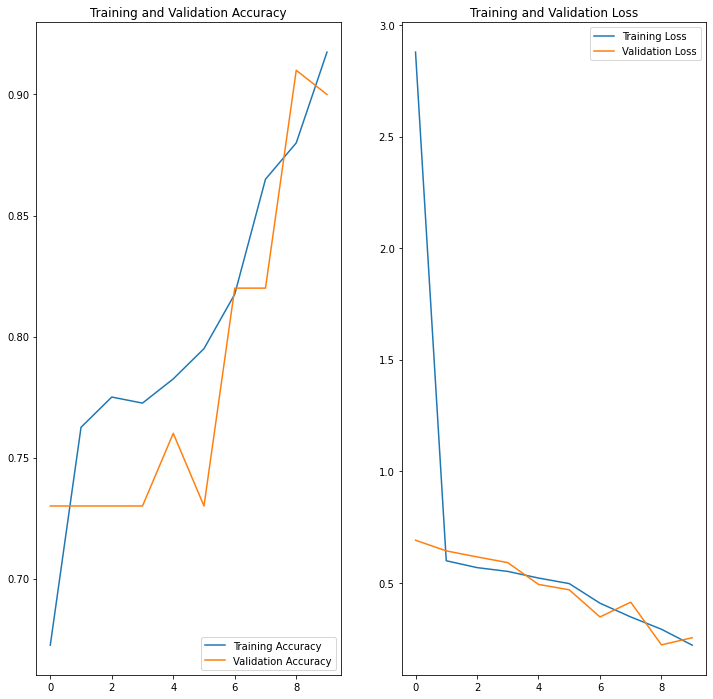

In [389]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [390]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 71ms/step - loss: 0.8704 - accuracy: 0.7019


[0.870377242565155, 0.7019230723381042]

#### 2-2 RandomFlip & RandomZoom

##### Build Model

In [391]:
dt_augms = {'randomflip', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomZoom
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_28 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_24 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_225 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_226 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2

##### Train Model

In [392]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 4.4068 - accuracy: 0.6742 - val_loss: 0.6149 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4291 - accuracy: 0.8079 - val_loss: 0.7203 - val_accuracy: 0.7500
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3514 - accuracy: 0.8646 - val_loss: 0.2082 - val_accuracy: 0.9200
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1936 - accuracy: 0.9115 - val_loss: 0.2155 - val_accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2183 - accuracy: 0.9004 - val_loss: 0.1937 - val_accuracy: 0.9500
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1683 - accuracy: 0.9314 - val_loss: 0.1646 - val_accuracy: 0.9600
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1502 - accuracy: 0.9515 - val_loss: 0.1969 - val_accuracy: 0.9500
Epoch 8/10
20/20 [=

##### Plot Evaluation

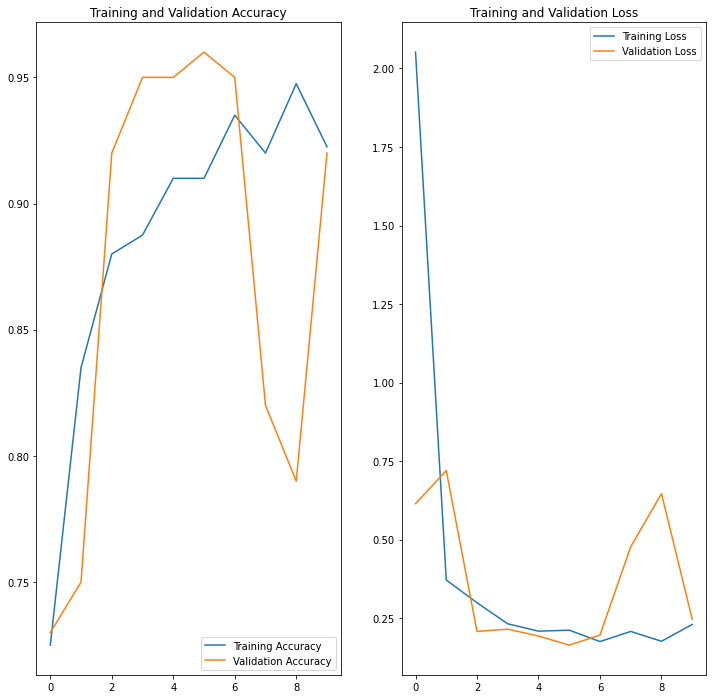

In [393]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [394]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 70ms/step - loss: 0.8149 - accuracy: 0.6955


[0.8148622512817383, 0.6955128312110901]

#### 2-3 RandomRotation & RotationZoom

##### Build Model

In [395]:
dt_augms = {'randomrotation', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomRotation & RandomZoom
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_25 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_25 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_232 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_230 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_231 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv

##### Train Model

In [396]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 3.8146 - accuracy: 0.5748 - val_loss: 0.6118 - val_accuracy: 0.7900
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 0.7709 - val_loss: 0.5839 - val_accuracy: 0.8400
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5089 - accuracy: 0.7834 - val_loss: 0.4761 - val_accuracy: 0.7400
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4273 - accuracy: 0.8223 - val_loss: 0.3247 - val_accuracy: 0.8300
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3204 - accuracy: 0.8776 - val_loss: 0.2103 - val_accuracy: 0.9300
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2587 - accuracy: 0.8981 - val_loss: 0.1458 - val_accuracy: 0.9400
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2421 - accuracy: 0.9184 - val_loss: 0.2038 - val_accuracy: 0.9200
Epoch 8/10
20/20 [=

##### Plot Evaluation

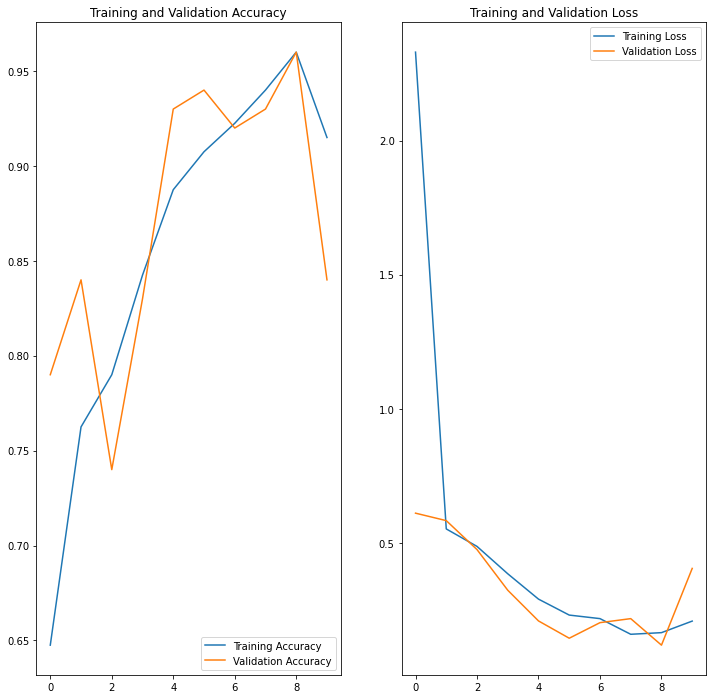

In [397]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [398]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 71ms/step - loss: 1.4169 - accuracy: 0.6603


[1.4169260263442993, 0.6602563858032227]

### 3.Apply all three augmentations

#### 3-1 RandomFlip, RandomRotation & RandomZoom

##### Build Model

In [399]:
dt_augms = {'randomflip', 'randomrotation', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomRotation & RandomZoom
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_29 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_26 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_26 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_235 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________

##### Train Model

In [400]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 5.2366 - accuracy: 0.6607 - val_loss: 0.6734 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6009 - accuracy: 0.7828 - val_loss: 0.6225 - val_accuracy: 0.7200
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5620 - accuracy: 0.7805 - val_loss: 0.5394 - val_accuracy: 0.7300
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5385 - accuracy: 0.7801 - val_loss: 0.5345 - val_accuracy: 0.9200
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4910 - accuracy: 0.7835 - val_loss: 0.4667 - val_accuracy: 0.7400
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3883 - accuracy: 0.8508 - val_loss: 0.2537 - val_accuracy: 0.8800
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3643 - accuracy: 0.8179 - val_loss: 0.2417 - val_accuracy: 0.8800
Epoch 8/10
20/20 [=

##### Plot Evaluation

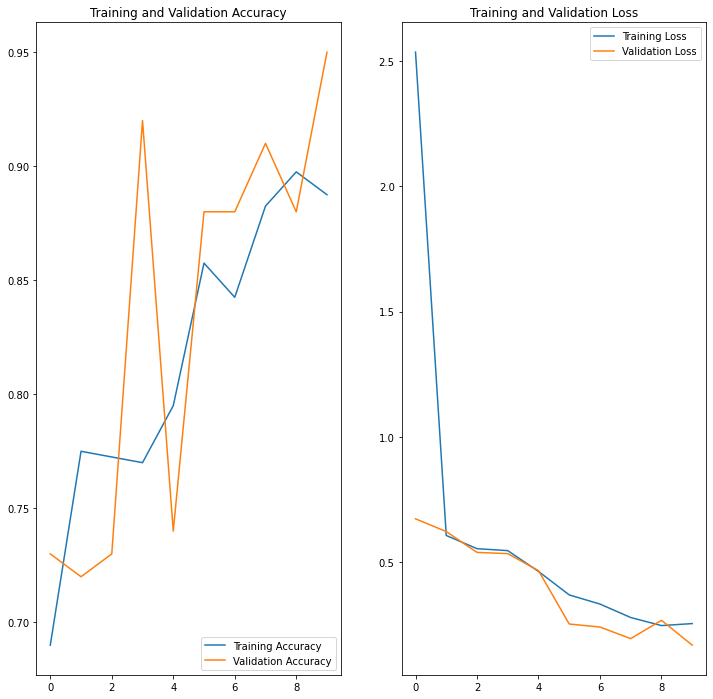

In [401]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [402]:
model_cnn_contrastive.evaluate(dt_test)

32/32 [==============================] - 3s 80ms/step - loss: 0.4324 - accuracy: 0.7853


[0.4323911964893341, 0.7852563858032227]

## Define a function to build a model (with Dropout)

### Dropout & Data Augmentation with best performance (Random Rotation)

### 1.Apply one augmentation and Dropout

#### 1-1 RandomRotation & Dropout

In [ ]:
def build_model_dropout_randomrotation(dt_train):
  
  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

##### Build a model

In [ ]:
model_cnn = build_model_dropout_randomrotation(dt_train)
model_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_5 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 11, 11, 64)      

##### Train the model

In [ ]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 11ms/step - loss: 1.1278 - accuracy: 0.6771 - val_loss: 0.6341 - val_accuracy: 0.8212
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.5058 - accuracy: 0.7609 - val_loss: 0.3108 - val_accuracy: 0.8461
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.3080 - accuracy: 0.8479 - val_loss: 0.1526 - val_accuracy: 0.9331
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2350 - accuracy: 0.9067 - val_loss: 0.1248 - val_accuracy: 0.9503
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2536 - accuracy: 0.8990 - val_loss: 0.1633 - val_accuracy: 0.9379
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1931 - accuracy: 0.9311 - val_loss: 0.1072 - val_accuracy: 0.9551
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1476 - accuracy: 0.9454 - val_loss: 0.1152 - val_accuracy: 0.9465
Epoch

Epoch 10/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1487 - accuracy: 0.9460 - val_loss: 0.0895 - val_accuracy: 0.9637

##### Plot the evaluation

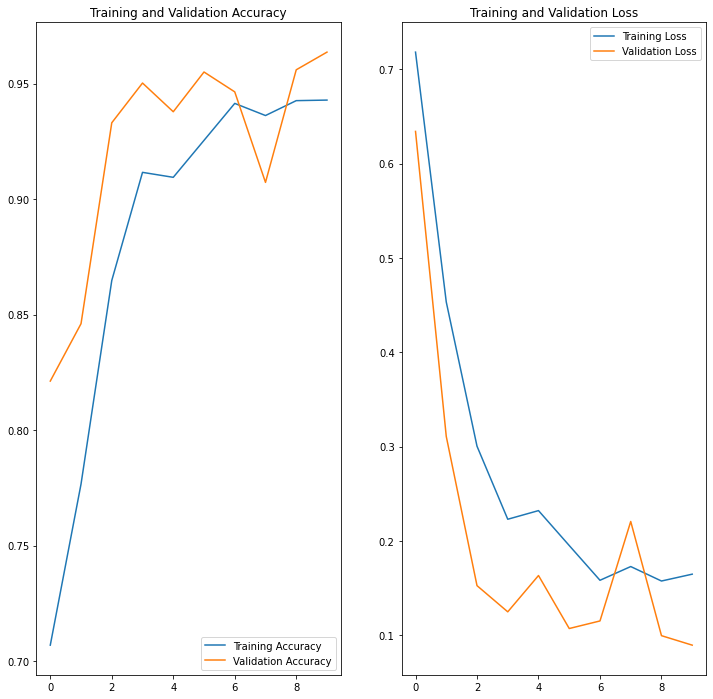

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()